**AMAZON ECOMMERCE TOP PRODUCTS ANALYSIS**

In today’s digital age, E-commerce has revolutionized the way we shop and conduct business. With the rise of online platforms, enormous amounts of data are generated daily.


In E-Commerce website like Amazon, conducting a "top product analysis" is crucial because it allows you to understand which products are performing best, identify areas for improvement, optimize marketing strategies, and ultimately increase sales by focusing efforts on the most popular items, while also identifying underperforming products that might need adjustments or removal from inventory.


In this Project, we analyse Amazon product dataset (created with help of amazon scout and amazon website). This dataset comprises of  attributes like Category, Product Name, Brand, Price, Ratings and Reviews. With Python as our tool of choice, we can leverage powerful libraries like Pandas and NumPy to explore, clean, and analyze this data efficiently. Python’s data visualization libraries such as Matplotlib and Seaborn enable us to create informative charts and graphs to identify patterns.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Collection**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATASETS/newtopamazon.csv")

**Understanding Data**

In [ ]:
df.head()

,Category,Product Name,Brand,Price (INR),User Rating,Total Reviews
0,Men's Apparel,Casual T-Shirt,Levi's,6000,4.2,1023
1,Men's Apparel,Slim Fit Jeans,Puma,6500,4.5,1500
2,Men's Apparel,Formal Shirt,Nike,7000,4.7,890
3,Men's Apparel,Joggers,Adidas,5500,4.1,2300
4,Men's Apparel,Hoodie,Reebok,7500,4.3,1345


In [ ]:
df.shape

(149, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       149 non-null    object 
 1   Product Name   149 non-null    object 
 2   Brand          149 non-null    object 
 3   Price (INR)    149 non-null    object 
 4   User Rating    149 non-null    float64
 5   Total Reviews  149 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 7.1+ KB


**Checking Null Values**

In [ ]:
df.isnull().sum()

,0
Category,0
Product Name,0
Brand,0
Price (INR),0
User Rating,0
Total Reviews,0


In [ ]:
df.dtypes

,0
Category,object
Product Name,object
Brand,object
Price (INR),object
User Rating,float64
Total Reviews,int64


In [ ]:
df['Price (INR)']=df['Price (INR)'].str.replace(',','').astype(int)

In [ ]:
for i in df:
  if df[i].dtype=='object':
    print(i,df[i].nunique())
    print('--------------------------------------------------')


Category 12
--------------------------------------------------
Product Name 138
--------------------------------------------------
Brand 57
--------------------------------------------------


In [ ]:
for i in df:
  if df[i].dtype=='object':
    print(df[i].value_counts())
    print('---------------------------')

Category
Watches                   19
Women's Dresses           18
Men's Sunglasses          16
Cosmetics                 16
Home Appliances           15
Men's Apparel             14
Smart Phones              14
Head Phones               14
Men's Apparels             8
beauty appliances          7
sports,fitness,outdoor     6
 Watches                   2
Name: count, dtype: int64
---------------------------
Product Name
Maxi Dress                      3
Bluetooth WirelessEarphones     3
Wireless HeadPhone              2
Mixer Grinder                   2
Party Wear Dress                2
                               ..
Electric Kettle                 1
Blender                         1
Air Purifier                    1
BB Cream                        1
Nylon Jacket                    1
Name: count, Length: 138, dtype: int64
---------------------------
Brand
Titan             11
Philips            7
Maybelline         7
Fastrack           6
Levi's             5
Samsung            5
Pum

In [ ]:
df['Category']=df['Category'].replace(' Watches','Watches')

In [ ]:
df['Category']=df['Category'].replace("Men's Apparel","Men's Apparels")

**Statistical Analysis of Numerical Datatype Columns**

In [ ]:
df.describe()

,Price (INR),User Rating,Total Reviews
count,149.000000,149.000000,149.000000
mean,4790.429530,4.216779,2709.073826
std,3960.216468,0.388588,3203.633647
min,799.000000,2.500000,127.000000
25%,1680.000000,4.000000,1012.000000
50%,3500.000000,4.200000,1426.000000
75%,7000.000000,4.500000,2800.000000
max,23000.000000,5.000000,15378.000000


**Exploratory Data Analysis**

***The average price of  popular product in each categories is listed below ↪***

In [ ]:
df1=df.copy()

In [ ]:
df1 = df1.groupby(['Category'])['Price (INR)'].mean().reset_index()
df1

,Category,Price (INR)
0,Cosmetics,2595.562500
1,Head Phones,3271.428571
2,Home Appliances,4394.333333
3,Men's Apparels,6300.272727
4,Men's Sunglasses,4282.000000
5,Smart Phones,11429.428571
6,Watches,4371.809524
7,Women's Dresses,4104.055556
8,beauty appliances,2719.571429
9,"sports,fitness,outdoor",1447.000000


In [ ]:
df2=df.copy()

In [ ]:
df2 = df2.groupby(['Category'])['Product Name'].count().reset_index()


***Number of popular products in each category is listed below***

In [ ]:
df2.columns=['Category','Product count']
df2

,Category,Product count
0,Cosmetics,16
1,Head Phones,14
2,Home Appliances,15
3,Men's Apparels,22
4,Men's Sunglasses,16
5,Smart Phones,14
6,Watches,21
7,Women's Dresses,18
8,beauty appliances,7
9,"sports,fitness,outdoor",6


***Popular product with most reviews***

In [ ]:

top_product_by_reviews = df.loc[df['Total Reviews'].idxmax()]


In [ ]:
print("Product with the most reviews:")
print(top_product_by_reviews)

Product with the most reviews:
Category                  Smart Phones
Product Name     OnePlus Nord CE 3 5G 
Brand                          Oneplus
Price (INR)                      16999
User Rating                        4.0
Total Reviews                    15378
Name: 74, dtype: object


OnePlus Nord CE 3 5G which comes under category Smart Phones Got more reviews.

***Category wise distribution***

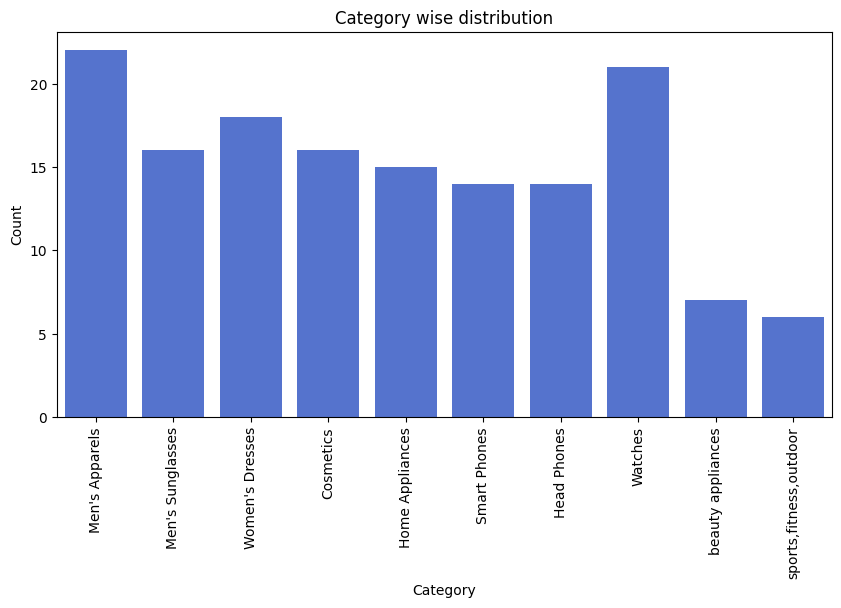

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Category'],color='royalblue')
plt.title('Category wise distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

***Top Brand in each category By reviews***

In [ ]:
df4=df.copy()

In [ ]:
top_brand_in_each_category_by_reviews=df4.groupby(['Category', 'Brand'])['Total Reviews'].sum().reset_index()

result = top_brand_in_each_category_by_reviews.loc[top_brand_in_each_category_by_reviews.groupby('Category')['Total Reviews'].idxmax()]

print("top brand in each category by reviews:")
print(result)

top brand in each category by reviews:
                  Category        Brand  Total Reviews
2                Cosmetics   Maybelline          39734
6              Head Phones          JBL          34456
18         Home Appliances       Pigeon           6589
22          Men's Apparels   Allen Soly           9431
29        Men's Sunglasses  John Jacobs           6654
35            Smart Phones      Oneplus          21106
43                 Watches        Titan          10546
52         Women's Dresses   Forever 21           4000
60       beauty appliances      Philips          12749
63  sports,fitness,outdoor       Kore K           5000


***Top Brand in each category By ratings***

In [ ]:
df5=df.copy()

In [ ]:
top_brand_in_each_category_by_ratings=df4.groupby(['Category', 'Brand'])['User Rating'].max().reset_index()

result = top_brand_in_each_category_by_ratings.loc[top_brand_in_each_category_by_ratings.groupby('Category')['User Rating'].idxmax()]

print("top brand in each category by ratings:")
print(result)

top brand in each category by ratings:
                  Category      Brand  User Rating
0                Cosmetics    L'Oreal          4.8
7              Head Phones    Oneplus          5.0
16         Home Appliances  Panasonic          4.6
24          Men's Apparels       Nike          5.0
27        Men's Sunglasses   Fastrack          4.9
36            Smart Phones      Redmi          4.5
39                 Watches   Fastrack          4.5
53         Women's Dresses        H&M          4.9
60       beauty appliances    Philips          5.0
64  sports,fitness,outdoor      Yonex          4.5


In [ ]:
df3=df.copy()

***Product with most reviews in each category***

In [ ]:
top_products_by_reviews_in_each_category = df3.loc[df3.groupby('Category')['Total Reviews'].idxmax()]

result = top_products_by_reviews_in_each_category[['Category', 'Product Name']]

print("Product with the most reviews in each category:")
print(result)

Product with the most reviews in each category:
                   Category                                   Product Name
67                Cosmetics                 Stay Matte Ink Liquid Lipstick
133             Head Phones                              Wireless Over ear
50          Home Appliances                                     Fan Heater
56           Men's Apparels  Men's Polyester Standard Length Casual Jacket
143        Men's Sunglasses                      Gunmetal Blue Transparent
74             Smart Phones                          OnePlus Nord CE 3 5G 
97                  Watches                             Decker Brown Watch
27          Women's Dresses                                  Printed Dress
109       beauty appliances                         Face Mini Hair Remover
116  sports,fitness,outdoor                 Pull-Up Bar and Ab Strap Combo


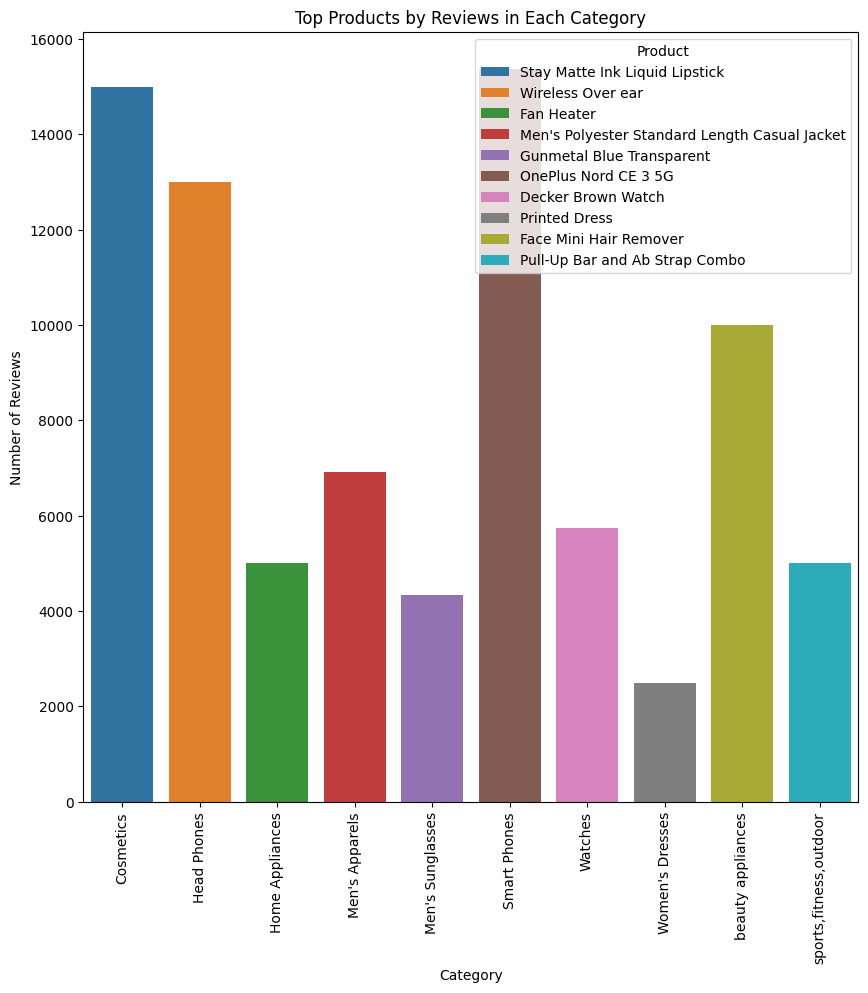

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='Category', y='Total Reviews', hue='Product Name', data=top_products_by_reviews_in_each_category, dodge=False)

plt.title('Top Products by Reviews in Each Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.legend(title='Product', loc='upper right')
plt.xticks(rotation=90)

plt.show()

***Top Products in each category By ratings***

In [ ]:
df6=df.copy()

In [ ]:
top_product_in_each_category_by_ratings=df6.groupby(['Category','Product Name'])['User Rating'].max().reset_index()

results = top_product_in_each_category_by_ratings.loc[top_product_in_each_category_by_ratings.groupby('Category')['User Rating'].idxmax()]

print("top product in each category by ratings:")
print(results)

top product in each category by ratings:
                   Category                       Product Name  User Rating
8                 Cosmetics                        Highlighter          4.8
20              Head Phones       Bluetooth WirelessEarphones           5.0
37          Home Appliances                      Mixer Grinder          4.6
58           Men's Apparels                   Polyester Jacket          5.0
62         Men's Sunglasses                     Cat-Eye Shades          4.9
81             Smart Phones                      Redmi 13C 5G           4.5
92                  Watches      Analog Black Dial Men's Watch          4.5
116         Women's Dresses                       Evening Gown          4.9
129       beauty appliances   Women  Electric Shaver For Legs,          5.0
134  sports,fitness,outdoor        Graphite Badminton Racquet           4.5


**CONCLUSION**

The best top products in each category are chosen based on the most number of reviews and high ratings.The best top products are listed above.

This analysis help us


*   To identify Products that generate the most revenue and are most popular among customers
*  To  allocate marketing resources more effectively by focusing promotional efforts on high-performing products.

*   To analyze data on top products to understand customer preferences, buying behaviors, and trends.
*   To analyze which product categories are most successful and adjust inventory accordingly to meet customer demand.


*   Evaluate pricing strategies for top products to ensure competitiveness and maximize profit margins.





  
             
                       


